In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Decision Tree (의사결정나무)
CART를 사용하여 분석하였다.

# Y: Categorical

## Step 1. Preprocessing

In [3]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DT_data.csv")

In [4]:
data # (0: failed, 1: succeed)

,age,marital,housing,loan,y
0,49,married,no,no,0
1,37,married,no,no,0
2,78,married,no,no,1
3,36,married,yes,no,0
4,59,divorced,no,no,0
...,...,...,...,...,...
32945,28,single,yes,no,0
32946,52,married,yes,no,0
32947,54,married,no,yes,0
32948,29,married,no,no,0


In [5]:
data.info()
# (0: failed, 1: succeed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      32950 non-null  int64 
 1   marital  32950 non-null  object
 2   housing  32950 non-null  object
 3   loan     32950 non-null  object
 4   y        32950 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [6]:
import pandas as pd
import numpy as np

data['y'].value_counts() # Y열의 데이터 개수 확인

0    29238
1     3712
Name: y, dtype: int64

*우리가 사용한 데이터셋에 결측치는 Unknown으로 표기되어있기 
때문에, Unknown이 할당되어있는 값을 numpy를 이용해 NaN 값으로 바꾸어 결측치를 검사했다.

In [7]:
data["marital"] = data.marital.map({"married":0, "single":1, "divorced":1})
data["housing"] = data.housing.map({"yes":0, "no":1, "unknown":np.nan})
data["loan"] = data.loan.map({"yes":0, "no":1,"unknown":np.nan})

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      32950 non-null  int64  
 1   marital  32885 non-null  float64
 2   housing  32154 non-null  float64
 3   loan     32154 non-null  float64
 4   y        32950 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.3 MB


결측치가 확인되었고 .dropna()를 이용해 제거했다.

In [9]:
data=data.dropna(axis=0)

아래에서 결측치가 제거된 것을 확인할 수 있다.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32090 entries, 0 to 32949
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      32090 non-null  int64  
 1   marital  32090 non-null  float64
 2   housing  32090 non-null  float64
 3   loan     32090 non-null  float64
 4   y        32090 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.5 MB


In [11]:
data.describe()

,age,marital,housing,loan,y
count,32090.000000,32090.000000,32090.000000,32090.000000,32090.000000
mean,40.010876,0.393051,0.463260,0.843814,0.112527
std,10.403240,0.488436,0.498656,0.363037,0.316019
min,17.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,1.000000,1.000000,1.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Features와 target 나누기
t_features = data[data.columns[:-1]]
t_target = data[data.columns[-1]]

In [13]:
t_features

,age,marital,housing,loan
0,49,0.0,1.0,1.0
1,37,0.0,1.0,1.0
2,78,0.0,1.0,1.0
3,36,0.0,0.0,1.0
4,59,1.0,1.0,1.0
...,...,...,...,...
32945,28,1.0,0.0,1.0
32946,52,0.0,0.0,1.0
32947,54,0.0,1.0,0.0
32948,29,0.0,1.0,1.0


In [14]:
t_target

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32090, dtype: int64

In [15]:
t_features

,age,marital,housing,loan
0,49,0.0,1.0,1.0
1,37,0.0,1.0,1.0
2,78,0.0,1.0,1.0
3,36,0.0,0.0,1.0
4,59,1.0,1.0,1.0
...,...,...,...,...
32945,28,1.0,0.0,1.0
32946,52,0.0,0.0,1.0
32947,54,0.0,1.0,0.0
32948,29,0.0,1.0,1.0


In [16]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 2021, stratify=t_target)

In [17]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

25672
25672
6418
6418


In [18]:
import pandas as pd
pd.DataFrame(train_target)['y'].value_counts() # Y열의 데이터 개수 확인

0    22783
1     2889
Name: y, dtype: int64

*class 불균형이 심하기 때문에 샘플링을 진행했다.



In [19]:

import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=312)
y_shuffled = sklearn.utils.shuffle(train_target, random_state=312)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=312).fit_resample(x_shuffled, y_shuffled)

아래에서 총 5778개의 데이터가 샘플링 된 것을 확인할 수 있다.

In [20]:
import pandas as pd
pd.DataFrame(train_target_us)['y'].value_counts() 

0    2889
1    2889
Name: y, dtype: int64

# -Gini index 사용

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 312)
train_features_us.info()

# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default), minimum number of samples required to be at a leaf node
# min_samples_split = None (default), minimum number of samples required to split an internal node. 이 값 이상이여야 추가 split 가능
tree_fit = tree.fit(train_features_us, train_target_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5778 entries, 0 to 5777
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      5778 non-null   int64  
 1   marital  5778 non-null   float64
 2   housing  5778 non-null   float64
 3   loan     5778 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 180.7 KB


In [22]:
tree_fit

DecisionTreeClassifier(random_state=312)

In [23]:
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import os
import numpy as np

In [24]:
feature_names = train_features_us.columns.tolist()
target_name = np.array(['failed', 'succeed'])

In [25]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Tree 이미지를 저장하기 위해서 경로 지정. 원하는 경로를 입력하세요

True

In [26]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [27]:
#CV 적용하여 결과값 확인
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_accuracy']),
                                     np.std(scores['test_accuracy'])))


CV accuracy: [0.53806228 0.56055363 0.55882353 0.56747405 0.53806228 0.57093426
 0.5449827  0.57612457 0.55979203 0.54592721]
CV aacuracy(Mean): 0.556 (std: 0.013)


In [28]:
y_pred = tree.predict(test_features)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

,Predict[0],Predict[1]
True[0],3768,1928
True[1],398,324


In [31]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      5696
           1       0.14      0.45      0.22       722

    accuracy                           0.64      6418
   macro avg       0.52      0.56      0.49      6418
weighted avg       0.82      0.64      0.70      6418



In [32]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.638
정밀도 precision: 0.144
재현율 recall: 0.449
F1-score: 0.218
AUC: 0.555


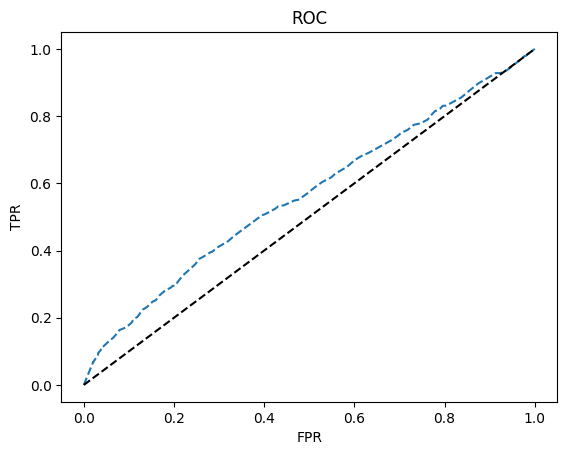

In [33]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# -Entropy 사용

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',random_state = 312)
train_features_us.info()

# criterion = 'entropy'
# max_depth = None (default)
# min_samples_leaf = 1 (default), minimum number of samples required to be at a leaf node
# min_samples_split = None (default), minimum number of samples required to split an internal node. 이 값 이상이여야 추가 split 가능
tree_fit = tree.fit(train_features_us, train_target_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5778 entries, 0 to 5777
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      5778 non-null   int64  
 1   marital  5778 non-null   float64
 2   housing  5778 non-null   float64
 3   loan     5778 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 180.7 KB


In [35]:
tree_fit

DecisionTreeClassifier(criterion='entropy', random_state=312)

In [36]:
feature_names = train_features_us.columns.tolist()
target_name = np.array(['failed', 'succeed'])

In [37]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Tree 이미지를 저장하기 위해서 경로 지정. 원하는 경로를 입력하세요

True

In [38]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [39]:
#CV 적용하여 결과값 확인
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_accuracy']),
                                     np.std(scores['test_accuracy'])))


CV accuracy: [0.53806228 0.56055363 0.55709343 0.56747405 0.53806228 0.57093426
 0.5449827  0.57093426 0.55979203 0.54766031]
CV aacuracy(Mean): 0.556 (std: 0.012)


Gini index를 사용한 것과 거의 같은 결과값을 보인다

In [40]:
y_pred = tree.predict(test_features)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

분류 결과도 Gini index와 동일하다.

In [42]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

,Predict[0],Predict[1]
True[0],3768,1928
True[1],398,324


In [43]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      5696
           1       0.14      0.45      0.22       722

    accuracy                           0.64      6418
   macro avg       0.52      0.56      0.49      6418
weighted avg       0.82      0.64      0.70      6418



In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.638
정밀도 precision: 0.144
재현율 recall: 0.449
F1-score: 0.218
AUC: 0.555


ROC 커브에서도 유의미한 차이는 없다

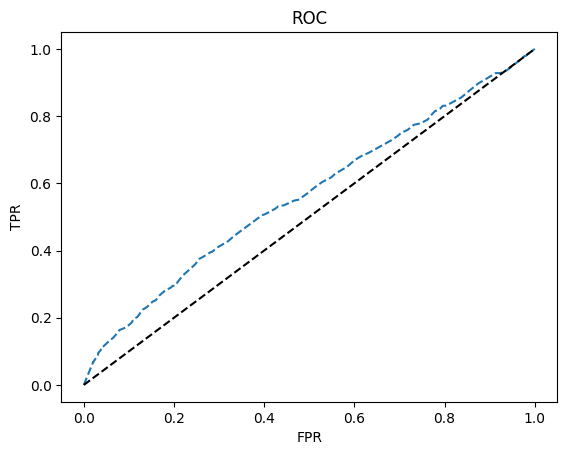

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

## Step 3. Optimization

In [46]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=312)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [47]:
pipe_tree.get_params().keys()

#수정 할만한 hyper parameter들

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

# max_depth

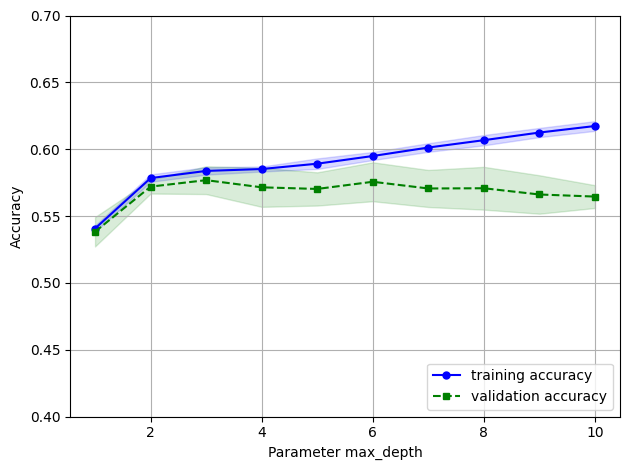

In [48]:
# max_depth

from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정. 다양한 max_depth를 실험해보면서 최적의 max_depth 찾기
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features_us, #train input 
                                                   y = train_target_us, #target label for train input
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서 실험하고 싶은 변수 이름
                                                   param_range=param_range, #위에서 설정한 변수의 실험값들 range
                                                   scoring="accuracy",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.4, 0.7]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()



Grid Search 진행 전 hyperparameter 중 max_leaf_nodes도 변경해 보았다.

# max_leaf_nodes

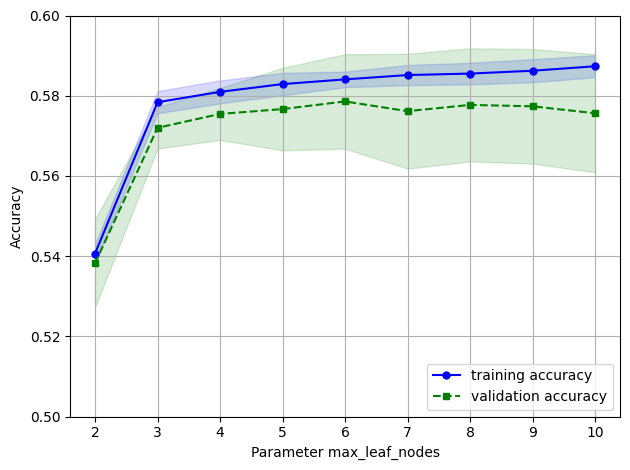

In [49]:
# max_leaf_nodes

from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_leaf_nodes 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features_us, #train input 
                                                   y = train_target_us, #target label for train input
                                                   param_name = 'decisiontreeclassifier__max_leaf_nodes', #pipe_tree.get_params().keys()에서 실험하고 싶은 변수 이름
                                                   param_range=param_range, #위에서 설정한 변수의 실험값들 range
                                                   scoring="accuracy",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_leaf_nodes')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_leaf_nodes')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.6]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()



max_depth보다 더 좋은 정확도가 나오지 않는것을 확인할 수 있다.

## Step 4. Grid Search

기존 참고한 코드에 min_samples_split을 추가로 변경해서 하이퍼 파라미터를 선택해 보았다.

In [50]:
from sklearn.model_selection import GridSearchCV
 
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']
param_range4 = [10,20,30,40,50]

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3,
               'decisiontreeclassifier__min_samples_split': param_range4}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', 
                 cv=10,
                 n_jobs= -1) # 병렬 처리; -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_)
print(gs.best_params_)

0.5789194197405744
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__min_samples_leaf': 30, 'decisiontreeclassifier__min_samples_split': 10}


## Step 5. Selecting the Best Model

# Grid search를 통해 나온 결과를 최종 선택했다.

In [51]:
best_tree = gs.best_estimator_
best_tree.fit(train_features_us, train_target_us)
best_tree_for_graph = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=30, random_state = 2021, min_samples_split=10)

In [52]:
best_tree_for_graph.fit(train_features_us, train_target_us)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=30,
                       min_samples_split=10, random_state=2021)

In [53]:
y_pred = best_tree.predict(test_features)

In [54]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],4539,1157
True[1],478,244


In [55]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      5696
           1       0.17      0.34      0.23       722

    accuracy                           0.75      6418
   macro avg       0.54      0.57      0.54      6418
weighted avg       0.82      0.75      0.78      6418



In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.745
정밀도 precision: 0.174
재현율 recall: 0.338
F1-score: 0.230
AUC: 0.567


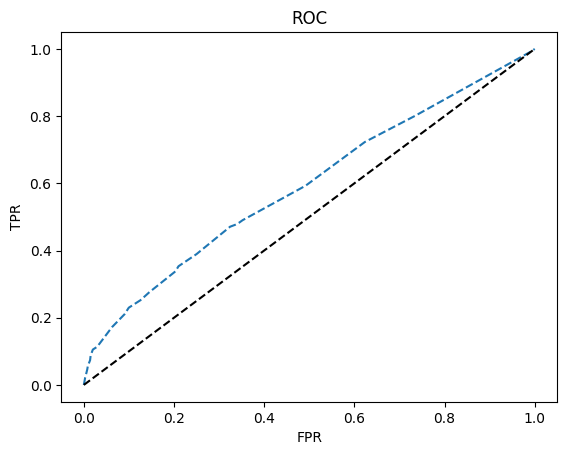

In [57]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [58]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['failed', 'succeed'])

In [59]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best.png') #Tree 이미지를 저장

True

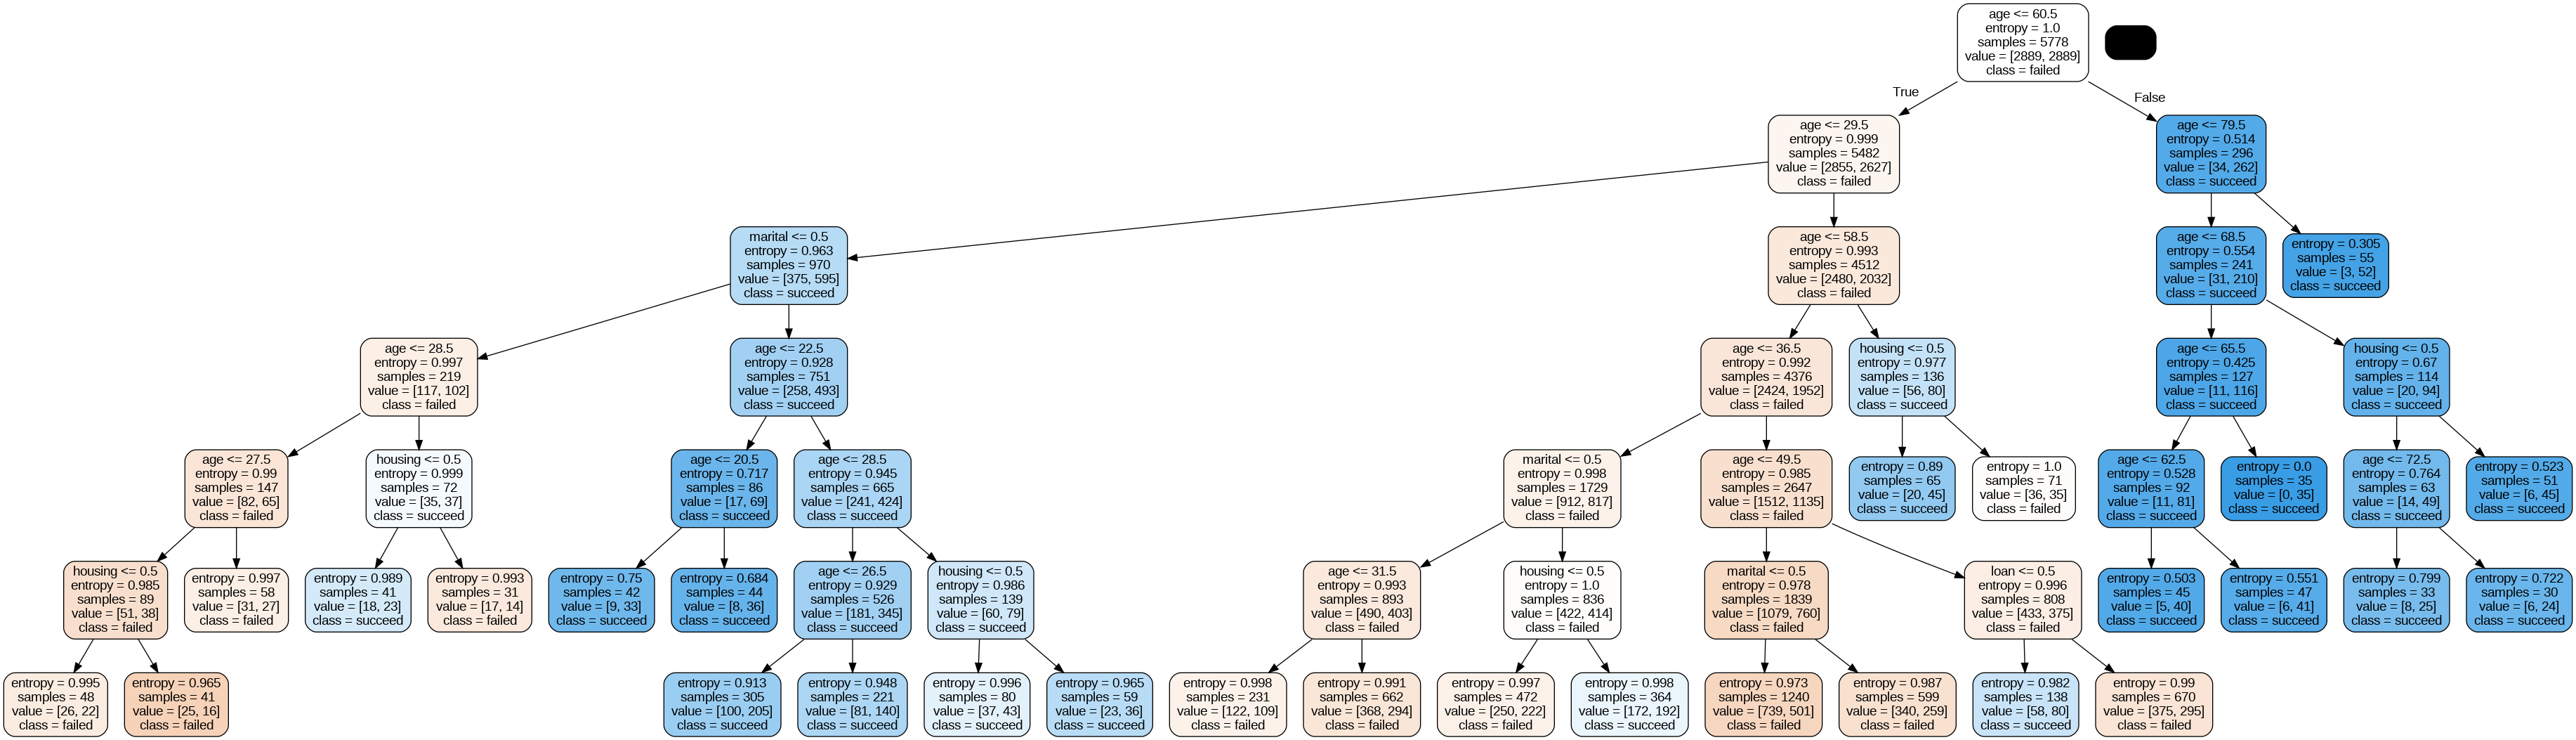

In [60]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

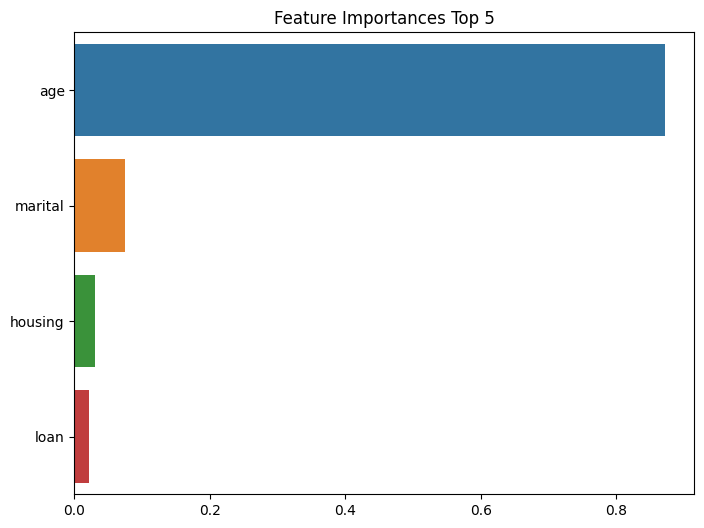

In [61]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [62]:
# 위의 그래프를 숫자로 표현
feature_importances.sort_values(ascending=False)

age        0.871492
marital    0.075119
housing    0.031146
loan       0.022243
dtype: float64

# Y: Continuous

## Step 1. Preprocessing

In [63]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,16.534920,13.689780,47.178410,New York,19.226183
1,16.259770,15.137759,44.389853,California,19.179206
2,15.344151,10.114555,40.793454,Florida,19.105039
3,14.437241,11.867185,38.319962,New York,18.290199
4,14.210734,9.139177,36.616842,Florida,16.618794
5,13.187690,9.981471,36.286136,New York,15.699112
6,13.461546,14.719887,12.771682,California,15.612251
7,13.029813,14.553006,32.387668,Florida,15.575260
8,12.054252,14.871895,31.161329,New York,15.221177
9,12.333488,10.867917,30.498162,California,14.975996


범주형 변수 State(주)를 제거하여 연속형 변수로만 분석을 진행했다. 

In [64]:
data = df.drop('State',axis=1)

In [65]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,7.372162,12.134464,21.102510,11.201264
std,4.590226,2.801780,12.229031,4.030618
min,0.000000,5.128314,0.000000,1.468140
25%,3.993637,10.373088,12.930013,9.013890
50%,7.305108,12.269980,21.271624,10.797819
75%,10.160280,14.484218,29.946908,13.976598
max,16.534920,18.264556,47.178410,19.226183


In [66]:
# Features와 target 나누기
t_features = data[data.columns[:-1]]
t_target = data[data.columns[-1]]

In [67]:
t_features

,R&D Spend,Administration,Marketing Spend
0,16.534920,13.689780,47.178410
1,16.259770,15.137759,44.389853
2,15.344151,10.114555,40.793454
3,14.437241,11.867185,38.319962
4,14.210734,9.139177,36.616842
5,13.187690,9.981471,36.286136
6,13.461546,14.719887,12.771682
7,13.029813,14.553006,32.387668
8,12.054252,14.871895,31.161329
9,12.333488,10.867917,30.498162


In [68]:
t_target

0     19.226183
1     19.179206
2     19.105039
3     18.290199
4     16.618794
5     15.699112
6     15.612251
7     15.575260
8     15.221177
9     14.975996
10    14.612195
11    14.425940
12    14.158552
13    13.430735
14    13.260265
15    12.991704
16    12.699293
17    12.537037
18    12.426690
19    12.277686
20    11.847403
21    11.131302
22    11.035225
23    10.873399
24    10.855204
25    10.740434
26    10.573354
27    10.500831
28    10.328238
29    10.100464
30     9.993759
31     9.748356
32     9.742784
33     9.677892
34     9.671280
35     9.647951
36     9.070819
37     8.994914
38     8.122906
39     8.100576
40     7.823991
41     7.779883
42     7.149849
43     6.975898
44     6.520033
45     6.492608
46     4.949075
47     4.255973
48     3.567341
49     1.468140
Name: Profit, dtype: float64

In [69]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
(train_features, test_features , train_target, test_target) = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 312)

In [70]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

40
40
10
10


종속변수의 분포 시각화

<ipython-input-71-3bd40c5419b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(train_target).loc[pd.DataFrame(train_target)['Profit'].notnull(), 'Profit'])


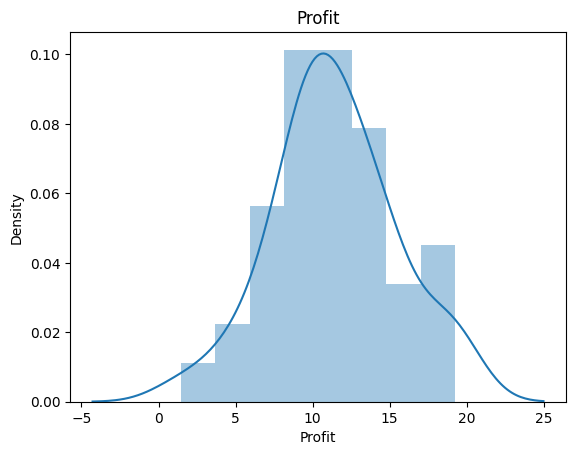

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(pd.DataFrame(train_target).loc[pd.DataFrame(train_target)['Profit'].notnull(), 'Profit'])
plt.title('Profit')
plt.show()


## Step 2. Decision Tree Modeling

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 312)

tree_fit = tree.fit(train_features, train_target)

In [73]:
tree_fit

DecisionTreeRegressor(random_state=312)

In [74]:
import numpy as np

feature_names = train_features.columns.tolist()
target_name = np.array(['Profit'])
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data)
graph_best.write_png('tree.png')

True

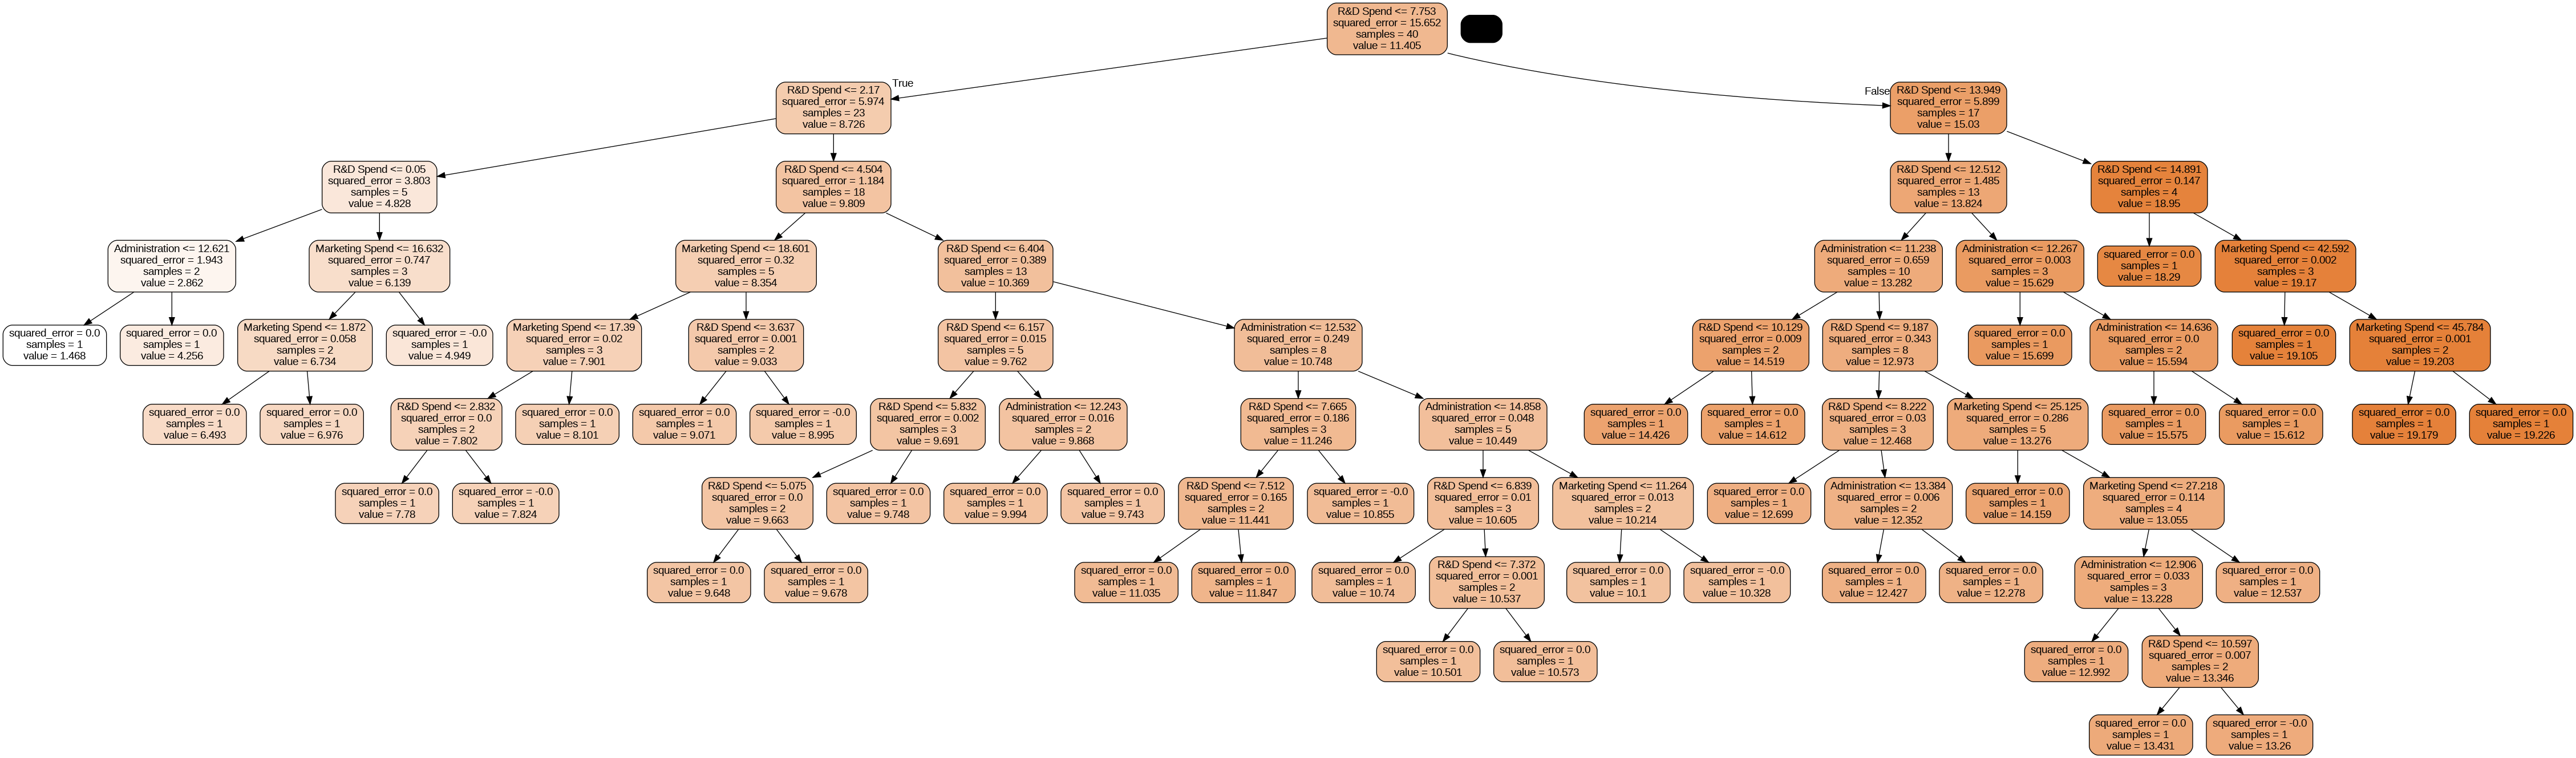

In [75]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

In [76]:
y_pred = tree.predict(test_features)

In [77]:
y_pred

array([ 6.492608,  7.779883,  7.779883, 14.612195,  4.949075, 12.537037,
       11.035225,  9.647951, 18.290199, 12.699293])

R-squared, MSE 값은 다음과 같다.

In [78]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(test_target, y_pred))
print('MSE: %.3f' % mean_squared_error(test_target,y_pred))



R squared: 0.794
MSE: 3.323


## Step 3. Optimization

In [79]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=312)) # default model로 시작
# hyper-parameter 값을 바꾸면서 여러 모델 사용

In [80]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeregressor', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

# max_depth

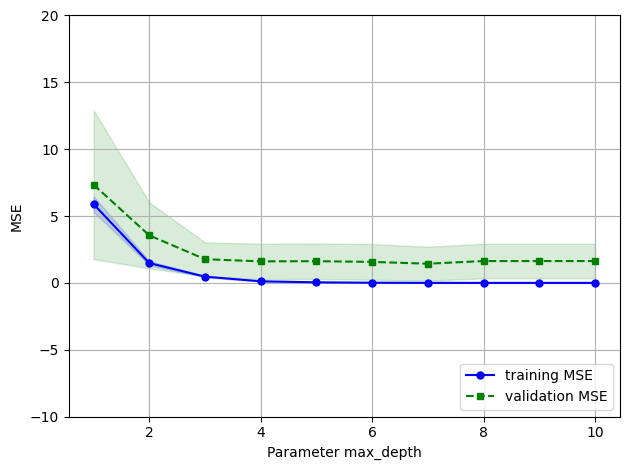

In [81]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서 비교 대상 선정
                                                   param_range=param_range,
                                                   scoring= "neg_mean_squared_error",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MSE')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation MSE')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MSE')
plt.ylim([-10.00, 20.00])
plt.tight_layout()
plt.show()



# max_leaf_nodes

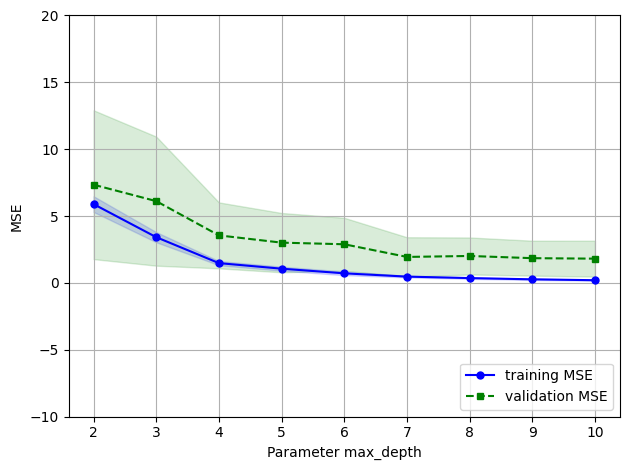

In [82]:
param_range = [1,2,3,4,5,6,7,8,9,10] # max_leaf_nodes 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__max_leaf_nodes', #pipe_tree.get_params().keys()에서 비교 대상 선정
                                                   param_range=param_range,
                                                   scoring= "neg_mean_squared_error",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MSE')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation MSE')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MSE')
plt.ylim([-10.00, 20.00])
plt.tight_layout()
plt.show()


## Step 4. Grid Search

기존 참고한 코드에 min_samples_split을 추가로 변경해서 하이퍼 파라미터를 선택해 보았다.

In [83]:
from sklearn.model_selection import GridSearchCV
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
param_range4 = [10,20,30,40,50]

param_grid = [{'decisiontreeregressor__max_depth': param_range1,
              'decisiontreeregressor__min_samples_leaf': param_range2,
              'decisiontreeregressor__criterion': param_range3,
               'decisiontreeregressor__min_samples_split': param_range4}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, 
                 scoring = 'neg_mean_squared_error',
                 cv=10,
                 n_jobs= -1, error_score='raise')

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

5.380773600946194
{'decisiontreeregressor__criterion': 'absolute_error', 'decisiontreeregressor__max_depth': 2, 'decisiontreeregressor__min_samples_leaf': 10, 'decisiontreeregressor__min_samples_split': 10}


## Step 5. Selecting the Best Model

In [84]:
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_features, train_target)

Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                                       min_samples_leaf=10,
                                       min_samples_split=10,
                                       random_state=312))])

In [85]:
best_tree_for_graph = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, min_samples_leaf=10,min_samples_split=10, random_state = 312)
best_tree_for_graph.fit(train_features, train_target)

DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                      min_samples_leaf=10, min_samples_split=10,
                      random_state=312)

In [86]:
y_pred = best_tree.predict(test_features)

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(test_target, y_pred))
print('MSE: %.3f' % mean_squared_error(test_target,y_pred))

R squared: 0.795
MSE: 3.319


In [88]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import numpy as np
feature_names = train_features.columns.tolist()
target_name = np.array(['Profit'])

dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph_best.write_png('tree_best_regression.png') #Tree 이미지를 저장

True

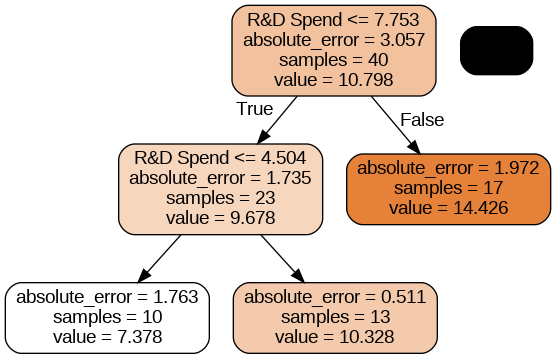

In [89]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

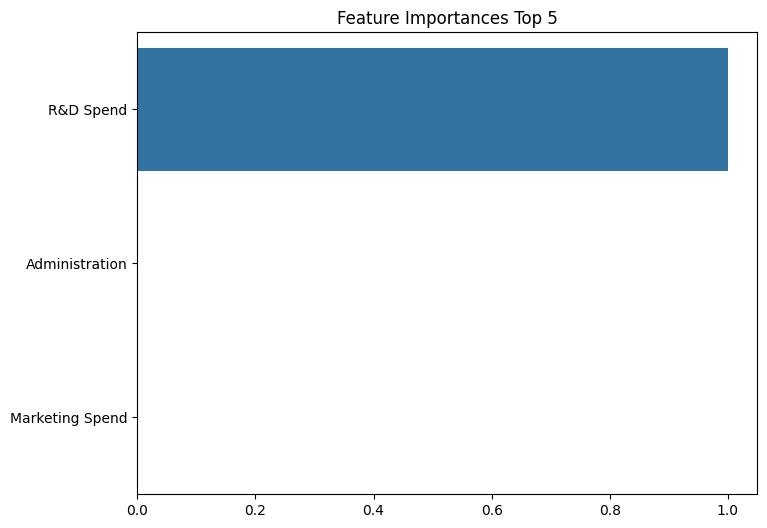

In [90]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features.columns)
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [91]:
feature_importances.sort_values(ascending=False)

R&D Spend          1.0
Administration     0.0
Marketing Spend    0.0
dtype: float64